In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets
from sklearn.linear_model import (LinearRegression, HuberRegressor, RANSACRegressor, TheilSenRegressor)

In [124]:
X, y, coef = datasets.make_regression(n_samples=N_SAMPLES, n_features=1, n_informative=1, noise=20, coef=True, random_state=42)
coef_list = [["original_coef", float(coef)]]
print(coef)

64.59172413316013


In [102]:
lr = LinearRegression().fit(X, y)
coef_list.append(["linear_regression", lr.coef_[0]])

In [15]:
plotline_X = np.arange(X.min(), X.max()).reshape(-1, 1) 
fit_df = pd.DataFrame(index = plotline_X.flatten(), data={"linear_regression": lr.predict(plotline_X)})

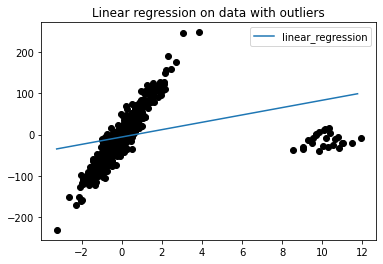

In [16]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Linear regression on data with outliers");

In [17]:
ransac = RANSACRegressor(random_state=42).fit(X, y)
fit_df["ransac_regression"] = ransac.predict(plotline_X)
ransac_coef = ransac.estimator_.coef_
coef_list.append(["ransac_regression", ransac.estimator_.coef_[0]])

In [18]:
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask
print(f"Total outliers: {sum(outlier_mask)}")
print(f"Outliers you added yourself: {sum(outlier_mask[:N_OUTLIERS])} / {N_OUTLIERS}")

Total outliers: 52
Outliers you added yourself: 25 / 25


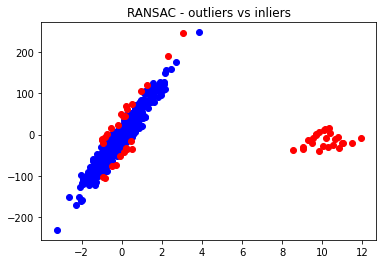

In [19]:
plt.scatter(X[inlier_mask], y[inlier_mask], color="blue", label="Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], color="red", label="Outliers")
plt.title("RANSAC - outliers vs inliers");

In [167]:
coef=20

In [168]:
import numpy as np
testx = np.loadtxt(open("/home/leelee/share/30way/RANSAC.csv","rb"),delimiter=",",usecols=[2])
testy = np.loadtxt(open("/home/leelee/share/30way/RANSAC.csv","rb"),delimiter=",",usecols=[3])
testx = testx.reshape(2459,1)
testy = testy.reshape(2459,1)
coef_list = [["original_coef", float(coef)]]

In [169]:
lr = LinearRegression().fit(testx, testy)
coef_list.append(["linear_regression", lr.coef_[0]])
plotline_X = np.arange(testx.min(), testx.max()).reshape(-1, 1) 

In [170]:
ransac = RANSACRegressor(random_state=82).fit(testx, testy)
fit_df["ransac_regression"] = ransac.predict(plotline_X)
ransac_coef = ransac.estimator_.coef_
coef_list.append(["ransac_regression", ransac.estimator_.coef_[0]])

In [171]:
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask
print(f"Total outliers: {sum(outlier_mask)}")
print(f"Outliers you added yourself: {sum(outlier_mask[:N_OUTLIERS])} / {N_OUTLIERS}")

Total outliers: 1015
Outliers you added yourself: 6 / 25


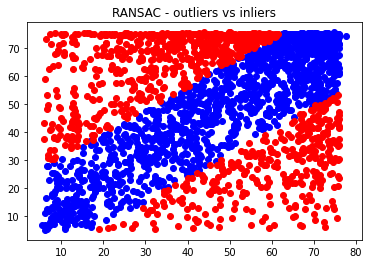

In [172]:
plt.scatter(testx[inlier_mask], testy[inlier_mask], color="blue", label="Inliers")
plt.scatter(testx[outlier_mask], testy[outlier_mask], color="red", label="Outliers")
plt.title("RANSAC - outliers vs inliers");

In [173]:
testx.tofile('/home/leelee/share/30way/testx.csv',sep = ',')
testy.tofile('/home/leelee/share/30way/testy.csv',sep = ',')
inlier_mask.tofile('/home/leelee/share/30way/inlier.csv',sep = ',')
outlier_mask.tofile('/home/leelee/share/30way/outlier.csv',sep = ',')

In [174]:
print(ransac_coef)

[[0.87668968]]
